# **TAREA 3**


En la presente tarea se solicita trabajar con algoritmos de predicción en donde se debera seleccionar un dataset de mas de 8000 datos el cual corresponde al siguiente https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch
 para la presente tarea, el cual se tuvo que cambiar con el entregado el dia 6 por el foro de canvas, ya que no me funcionaba nada con el dataset elegido anteriormente.

Una vez escogido el dataset se debe entrenar el algoritmo KNN sobre los datos seleccionados y aplicar predicciones con algún (sub)conjunto DISJUNTO de prueba, utilizando 2 métricas (a su elección) de error y compararlas entre sí.

Luego se debe entrenar el algoritmo de Regresión Lineal con los mismos datos seleccionados, aplicando también predicciones sobre el mismo (sub)conjunto DISJUNTO de prueba de la parte anterior y elejir alguna métrica de error de entre las dos de la parte anterior y comparar los errores, dando una explicación de qué sucede.

Y finalmente, se debe tomar el mismo dataset y entrenar los algoritmos de clasificación, Gaussian Mixture Model, Mean-Shift y DBSCAN y evaluarlos sobre el mismo (sub)conjunto DISJUNTO de las partes mencionadas anteriormente, analizando la diferencia en los resultados entre los algoritmos, indicando y aportando evidencia en la diferencia fundamental (clustering vs. estimación de densidad) que existen entre los tres algoritmos.

Para comenzar esta tarea se realizan los siguientes pasos de manera de importar y  obtener el dataset elegido al igual que en la tarea 1 para su posterior utilización.

In [1]:
!pip install kaggle -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/ColabNotebooks/kaggle/kaggle-2.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rankirsh/evolution-of-top-games-on-twitch

mkdir: cannot create directory ‘/root/.kaggle’: File exists
evolution-of-top-games-on-twitch.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
with zipfile.ZipFile('evolution-of-top-games-on-twitch.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv('Twitch_game_data.csv', encoding='cp1252')
print(dataset.shape)
print(dataset)


(18600, 12)
       Rank                              Game  Month  Year  Hours_watched  \
0         1                 League of Legends      1  2016       94377226   
1         2  Counter-Strike: Global Offensive      1  2016       47832863   
2         3                            Dota 2      1  2016       45185893   
3         4                       Hearthstone      1  2016       39936159   
4         5       Call of Duty: Black Ops III      1  2016       16153057   
...     ...                               ...    ...   ...            ...   
18595   196                          PlateUp!      9  2023         560064   
18596   197                       PokÃ©mon GO      9  2023         551596   
18597   198                       Bloons TD 6      9  2023         540735   
18598   199                   Ragnarok Online      9  2023         533644   
18599   200                        Bloodborne      9  2023         530610   

       Hours_streamed  Peak_viewers  Peak_channels  Streamers  

Una vez mencionado lo anterior, se instalan las distintas librerías y paquetes de Python para llevar a cabo la tarea.

Para esto se instala o actualiza las bibliotecas matplotlib, luego importa las bibliotecas matplotlib, pandas, numpy y sklearn con alias específicos para su uso en el código posterior.



In [7]:
!pip install -U matplotlib -q
import matplotlib as plt
import pandas as pd
import numpy as np
from sklearn import datasets

En la siguiente etapa de código  se separa el dataset en una proporción de 50% para training y 50% para testing, en donde para testing se van las filas impares y para training las filas pares. Una vez implementado esto, se entregan como resultado las dimensiones de los conjuntos de datos de entrada y salida para entrenamiento y prueba, realizando las operaciones necesarias.



In [8]:
#Se agrega una nueva columna llamada 'numero_fila' al dataset, en donde la columna contiene numero de filas que van desde 1 hasta la longitud total del conjunto de datos.
dataset['numero_fila'] = range(1, len(dataset) + 1)

#Se crean dos nuevos dataset, dataset_entrenamiento y dataset_prueba, filtrando las filas de dataset según si el número de fila sea par o impar, respectivamente.
#dataset_entrenamiento filas pares y dataset_prueba filas impares.
dataset_entrenamiento = dataset[dataset['numero_fila'] % 2 == 0]
dataset_prueba = dataset[dataset['numero_fila'] % 2 == 1]

#Se extraen las columnas 'Rank','Streamers','Peak_viewers' como arrays NumPy para las variables de entrada (dataset_entrenamiento, dataset_prueba),
# y la columna 'Avg_viewers' como arrays NumPy para las variables de salida (dataset_entrenamiento, dataset_prueba).
entrada_entrenamiento = np.array(dataset_entrenamiento[['Rank','Streamers','Peak_viewers']])
salida_entrenamiento = np.array(dataset_entrenamiento[['Avg_viewers']])
entrada_prueba = np.array(dataset_prueba[['Rank','Streamers','Peak_viewers']])
salida_prueba = np.array(dataset_prueba[['Avg_viewers']])

#Se imprime la forma de cada uno de los arrays creados, proporcionando información sobre el número de filas y columnas en cada array.
print(entrada_entrenamiento.shape)
print(salida_entrenamiento.shape)
print(entrada_prueba.shape)
print(salida_prueba.shape)

(9300, 3)
(9300, 1)
(9300, 3)
(9300, 1)


En el siguiente apartado se importan e instalan las librerias necesarias para implementar los modelos de clasificación pedidos en el enunciado.

En donde se instala o actualiza la biblioteca scikit-learn.
Se importa la biblioteca Matplotlib para la visualización de gráficos, el modelo KNeighborsRegressor de scikit-learn, regresor basado en vecinos más cercanos, el modelo KNeighborsClassifier de scikit-learN, clasificador basado en vecinos más cercanos, el modelo de regresión lineal, DBSCAN y GMM de scikit-learn y finalmente la métrica de error cuadrático medio y la metrica de error maximo.

In [9]:
!pip install -U scikit-learn -q
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

# **ALGORITMO KNN**

KNN es un algoritmo de aprendizaje supervisado, la idea principal de KNN es  clasificar un nuevo punto de datos basándose en la mayoría de las clases de sus k vecinos más cercanos en el espacio de características.

Para este caso, se nos pide entrenar el algoritmo KNN sobre los datos seleccionados y aplicar predicciones con algún (sub)conjunto DISJUNTO de prueba, utilizando 2 métricas de error y compárelas entre sí.

Para responder a esto se presenta el siguiente codigo, en donde se toman como métricas de error, el error cuadratico medio y el error máximo residual, dando como valores 319274690.75253284 y 361266.0 respectivamente.

Si comparamos estos valores podemos decir lo siguiente:
Para la metrica del error cuadratico medio, mientras menor sea, mejor sera el rendimiento del modelo. Mientras que para el error maximo residual un valor mas bajo indica un mejor rendimiento en términos de la peor predicción.

Por ende, podemos decir que en terminos de comparación en cuanto a un uso en evaluación, MSE se usa como medida global del rendimiento. Mientras que Error Máximo Residual, se centra en el peor caso y puede ser útil para identificar predicciones extremadamente inexactas. En MSE los errores grandes tienen un impacto siginificativo mientras que en Error Maximo Residual son menos sensibles ya que considera el error maximo.

Es por este que tiene sentido que el Error Maximo Residual sea menor al Error Cuadratico Medio entregados los resultados.


In [10]:
#Se crea un modelo KNN para regresión con los 6 vecinos más cercanos.
KNN = KNeighborsRegressor(n_neighbors=6)

#Se entrena el modelo utilizando datos de entrada (entrada_entrenamiento) y sus correspondientes salidas reales (salida_entrenamiento).
KNN.fit(entrada_entrenamiento, salida_entrenamiento)

#Se utilizan los datos de prueba (entrada_prueba) para realizar predicciones utilizando el modelo.
#Almacenan las predicciones en la variable respuesta_prediccion1 y las imprime.
respuesta_prediccion1 = KNN.predict(entrada_prueba)
print(KNN.predict(entrada_prueba))

#Calcula e imprime las 2 metricas de error pedidas en el enunciado. (MSE y Error Maximo Residual en este caso).

#Calcula la media de los cuadrados de las diferencias entre los valores reales (salida_prueba) y las predicciones (respuesta_prediccion1).
print("Error Cuadrático Medio: ", mean_squared_error(salida_prueba , respuesta_prediccion1))

#Calcula la diferencia máxima absoluta entre los valores reales y las predicciones.
print("Error Máximo Residual: ", max_error(salida_prueba , respuesta_prediccion1))

[[67910.        ]
 [55189.33333333]
 [19190.33333333]
 ...
 [  372.        ]
 [  408.        ]
 [ 1034.33333333]]
Error Cuadrático Medio:  319274690.75253284
Error Máximo Residual:  361266.0


# **ALGORITMO REGRESIÓN LINEAL**

La regresión lineal es un algoritmo de aprendizaje supervisado utilizado para predecir el valor de una variable continua (variables dependientes) basándose en una o más variables predictoras (variables independientes). El objetivo de la regresión lineal es encontrar la mejor línea que se ajuste a los datos de entrenamiento.

Para este caso, se nos solicita entrenar el algoritmo de Regresión Lineal con los mismos datos seleccionados, aplicando también predicciones sobre el mismo (sub)conjunto DISJUNTO de prueba de la parte anterior. y elijiento alguna en KNN explicando que sucede.

Como se menciono anteriormente, este algoritmo tiene como objetivo encontrar la mejor linea que se ajuste a los datos de entrenamiento. Para este caso se tomaron los datos de entrenamiento 'Rank', 'Streamers', 'Peak_viewers', entonces para demostrar que se acerca a una linea recta en la segunda característica de la entrada_prueba el cual corresponde a los streamers, se grafica representando lo mencionado.

Ademas, se toma como metrica el error cuadratico medio, el cual tiene un valor de 318662359.4903684, de este valor en comparación con el valor obtenido en KNN se puede apreciar que se acerca muchisimo bajo la misma métrica, variando netamente en un numero muy pequeño, lo cual puede explicarse ya que se esta trabajando con los mismos datos en ambos casos.

In [11]:
#Se crea una instancia del modelo de regresión lineal (LinearRegression()).
regresion_lineal = LinearRegression()

#El modelo se entrena utilizando el conjunto de entrenamiento.
regresion_lineal.fit(entrada_entrenamiento, salida_entrenamiento)

#Se utilizan las características del conjunto de prueba (entrada_prueba) para predecir los valores de la variable dependiente utilizando el método predict del modelo de regresión lineal.
#Las predicciones se imprimen y se almacenan en la variable respuesta_prediccion2.
print(regresion_lineal.predict(entrada_prueba))
respuesta_prediccion2 = regresion_lineal.predict(entrada_prueba)

#Se calcula el Error Cuadrático Medio comparando las predicciones (respuesta_prediccion2) con las etiquetas reales del conjunto de prueba (salida_prueba).
print("Error Cuadrático Medio: ", mean_squared_error(salida_prueba , respuesta_prediccion2))


[[57129.84624048]
 [30614.35928057]
 [41480.5284498 ]
 ...
 [-3972.51752275]
 [-3348.11195023]
 [-3333.02771245]]
Error Cuadrático Medio:  318662359.4903684


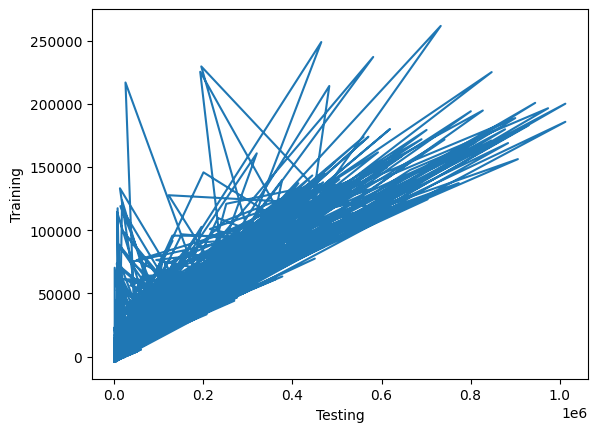

In [12]:
#Gráfico de dispersión para la segunda característica de entrada_prueba
plt.figure(1)
plt.plot(entrada_prueba[:,1],respuesta_prediccion2)
plt.xlabel('Testing')
plt.ylabel('Training')
plt.show()

# **ALGORITMOS DE CLASIFICACIÓN**

Para esta parte se solicita usar el mismo dataset y entrenar 3 algoritmos de clasificación,Gaussian Mixture Model, Mean-Shift y DBSCAN evaluando estos sobre
los mismo (sub)conjunto DISJUNTO de las partes 1 y 2, analizando la diferencia en los resultados.

Ademas, se pide indicar y aportar evidencia en la diferencia fundamental (clustering vs. estimación de densidad) que existen entre los tres algoritmos

**Gaussian Mixture Model**

GMM es un método de clustering probabilístico y flexible que modela la distribución de datos como una mezcla de gaussianas, y utiliza el algoritmo EM para ajustar sus parámetros.

Para este algoritmo se espera clasificar los datos entregados como parámetros Rank, Streamers, Peak_viewers e identificar cual es el que aporta más a la predicción del parámetro Avg_viewers. Y para entrenarlo se presenta el siguiente codigo en donde se toman 3 cluster, una matriz de covarianza del modelo completa y un parametro que inicializa los parametros del modelo utilizando un algoritmo K-means obteniendo como respuesta luego de realizar las predicciones las etiquetas de cluster asignadas a cada punto de datos en los datos de prueba.

In [13]:
#Se crea un objeto GaussianMixture llamado GMM con los siguientes parametros.
#n_components=3, indica que se desea ajustar tres componentes (clusters).
#covariance_type="full", especifica que la matriz de covarianza del modelo es completa, es decir, no hace suposiciones sobre la independencia entre las variables.
#init_params="kmeans", inicializa los parámetros del modelo utilizando el algoritmo K-means.
GMM = GaussianMixture(n_components=3, covariance_type="full", init_params="kmeans")

#Se entrenar el modelo GMM con los datos de entrada de entrenamiento (entrada_entrenamiento) y las salidas correspondientes (salida_entrenamiento).
GMM.fit(entrada_entrenamiento, salida_entrenamiento)

#Se accede a las medias de las componentes gaussianas aprendidas durante el entrenamiento.
GMM.means_

#Se realizan las predicciones en los datos de prueba (entrada_prueba) y el resultado se almacena en la variable resultado_prediccion3.
resultado_prediccion3 = GMM.predict(entrada_prueba)

#Se imprime la variable resultado_prediccion3 la cual contiene las etiquetas de cluster asignadas a cada punto de datos en los datos de prueba.
print(resultado_prediccion3)

[1 1 1 ... 0 0 0]


**DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering no supervisado que agrupa puntos de datos basándose en la densidad de sus vecindarios.

Para entrenar el modelo se presenta el siguiente codigo, en donde se definen sus varibles eps o epsilon que corresponde al radio alrededor de un punto central y un min_samples o numero minimo de muestras que corresponde a donde se busca un numero para considerarlo como nucleo del clustes, obteniendo luego de la prediccion las asignaciones de cluster generadas por el algoritmo para los datos de prueba.


In [14]:
#Se crea un objeto DBSCAN con un valor de epsilon (eps) de 0.5 y un número mínimo de muestras (min_samples) de 20.
#eps define el radio alrededor de un punto central dentro del cual se busca un número mínimo de puntos (min_samples) para considerar ese punto como núcleo de un cluster.
dbscan = DBSCAN(eps=0.5, min_samples=20)

#se entrena utilizando los datos de entrada de entrenamiento (entrada_entrenamiento). Ya que no es necesario proporcionar las de salida puesto que es un algoritmo no supervisado.
dbscan.fit(entrada_entrenamiento)

# Se realiza la predicción de las asignaciones de clusters en los datos de prueba (entrada_prueba).
resultado_prediccion4 = dbscan.fit_predict(entrada_prueba)

#Imprime las asignaciones de clusters generadas por DBSCAN para los datos de prueba.
print(resultado_prediccion4)

[-1 -1 -1 ... -1 -1 -1]


**Mean Shift**


Mean Shift es un algoritmo de clustering que busca automáticamente los centroides de alta densidad en un conjunto de datos para identificar las regiones densas.


En el presente codigo se entrena en algoritmo Mean shift en donde se crea la instancia del modelo Mean Shift y lo entrena el modelo utilizando datos de entrada de entrenamiento. Luego accede a los centroides los cuales representan las ubicaciones finales de los clusters, realiza predicciones en un conjunto de datos de prueba y almacena las etiquetas de cluster asignadas a cada punto de datos en la variable resultado_prediccion5 e imprime estas etiquetas,proporcionando información sobre la pertenencia de cada punto de datos a un cluster específico según el modelo Mean Shift entrenado.

In [15]:
from sklearn.cluster import MeanShift

#Se crea una instancia del modelo Mean Shift.
mean_shift = MeanShift()

#Se entrena el modelo Mean Shift con los datos de entrada de entrenamiento
mean_shift.fit(entrada_entrenamiento)

#Se accede a los centroides (o modas) aprendidos durante el entrenamiento.
centroides = mean_shift.cluster_centers_

#Se realizan las predicciones en los datos de prueba.
resultado_prediccion5 = mean_shift.predict(entrada_prueba)

#Se imprime las etiquetas de cluster asignadas a cada punto de datos en los datos de prueba.
print(resultado_prediccion5)

[9 1 7 ... 0 0 0]


**ANALISIS DE LOS ALGORITMOS DE CLASIFICACIÓN**

Para comenzar con el analisis se debe decir que los tres algoritmos predicen distintos valores para las etiqutas, ya que son algoritmos diferentes.

Si los comparamos en cuanto a la diferencia fundamental (clustering vs. estimación de densidad). GMM modela datos como una mezcla de gaussianas, es probabilístico y asume una forma paramétrica para los clusters. DBSCAN utiliza la densidad para definir clusters, es no paramétrico y no asume una forma particular para los clusters y Mean Shift busca modas en los datos, es no paramétrico y no asume una forma particular para los clusters.

En cuanto a los resultados podemos decir que existen diferencias importantes entre ellos. Por ejemplo, DBSCAN puede utilizar valores negativos para indicar las etiquetas obtenidas, en donde estos valores negativos representan los puntos de ruido, es decir puntos que no pertenecen a ningun cluster, mientras que GMM y Mean Shift utilizan valores mayores o iguales a cero, pero no negativos como se demostro al generarlos. Ademas GMM trabaja con EM por ende puede trabajar con distribuciones de  datos ocultos a diferencia de DBSCAN que puede trabajar solo con distribuciónes de datos visibles para poder trabajar.

Mencionado esto, se realiza un analisis detallado de las multiples diferencias que presenta cada algoritmo.

**DBSCAN**
1. agrupa puntos basandose en la densidad de los datos, es decir, forma un grupo alrededor de un punto central si hay suficientes puntos dentro de un distancia determinada.
2. Sus clusters pueden ser de diferentes formas y tamaños
3. Puede identificar puntos de ruido, es decir, puntos que no estan dentro de ingun cluster.
4. Tiene dos parametros principales, la distancia máxima entre dos puntos para ser considerados parte del mismo cluster y el número mínimo de puntos dentro de esa distancia para formar un cluster.

**GMM**

1. Modela cada cluster como una distribución gaussiana y la mezcla de estas distribuciones corresponde alconjunto completo de datos.
2. Flexibilidad de formas de cluster, ya que cada componente gaussiano puede tener su propia forma.
3. Asigna probabilidades a la pertenencia de un punto a cada cluster.
4. Requiere de parametros como el número de componentes gaussianos y los parámetros de cada componente (media, covarianza).

**MEAN SHIFT**

1. A diferencia de DBSCAN y GMM, Mean Shift no requiere especificar de antemano el número de clusters, ya que encuentra automáticamente el número de clusters basándose en las densidades de datos.
2. Se adapta a formas irregulares de clusters debido a su enfoque basado en densidades locales.
3. El tamaño del kernel afecta a los resultados, ya que determina la escala a la que se evalua la densidad.
4. Agrupa puntos moviendo el kernel ponderando hacia regiones de mayor densidad en el espacio.

Finalmente, podemos decir que al momento de elegir alguno mas eficiente va a variar mucho de la naturaleza de los datos y de los objetivos relacionados a los resultados, ya que cada algoritmo trabaja de manera diferente.


